# RAIN (WATER RESOURCE PREDICTION)

## Rain Resource Prediction Definition

In this study, water level is used as a proxy for rainwater resource availability.
Rainfall, temperature, humidity, and evaporation are considered key climatic
variables influencing surface water accumulation. Machine learning models are
applied to predict water level, thereby supporting rainwater resource prediction
and water resource management.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
# Load dataset
data = pd.read_csv("hydrological_data_1000_rows (1).csv")

# Display first 5 rows
data.head(15)


,Date,Rainfall_mm,Temperature_C,Humidity_%,Evaporation_mm,Water_Level
0,1/1/2022,11.97,21.37,66.13,3.61,50.42
1,1/2/2022,7.47,26.67,86.93,3.19,50.63
2,1/3/2022,6.91,20.98,68.05,3.48,50.80
3,1/4/2022,6.91,30.04,66.98,3.84,50.96
4,1/5/2022,23.25,27.33,64.30,5.33,51.85
5,1/6/2022,14.33,21.17,60.19,5.53,52.29
6,1/7/2022,5.66,25.76,65.26,4.56,52.35
7,1/8/2022,12.35,23.99,69.21,5.69,52.68
8,1/9/2022,9.99,28.28,81.96,2.49,53.06
9,1/10/2022,1.08,32.36,57.50,2.53,52.98


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Rainfall_mm     1000 non-null   float64
 2   Temperature_C   1000 non-null   float64
 3   Humidity_%      1000 non-null   float64
 4   Evaporation_mm  1000 non-null   float64
 5   Water_Level     1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [17]:
data.isnull().sum()


Date              0
Rainfall_mm       0
Temperature_C     0
Humidity_%        0
Evaporation_mm    0
Water_Level       0
dtype: int64

In [37]:
data.describe()


,Rainfall_mm,Temperature_C,Humidity_%,Evaporation_mm,Water_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.299800,27.055330,74.396030,4.984060,178.174940
std,7.014379,3.881745,11.359767,1.723204,77.085664
min,0.230000,14.920000,55.000000,2.000000,50.420000
25%,5.132500,24.427500,64.480000,3.532500,115.727500
50%,8.645000,27.045000,74.270000,4.895000,173.410000
75%,13.715000,29.662500,84.032500,6.502500,245.382500
max,38.930000,39.550000,94.980000,7.990000,315.790000


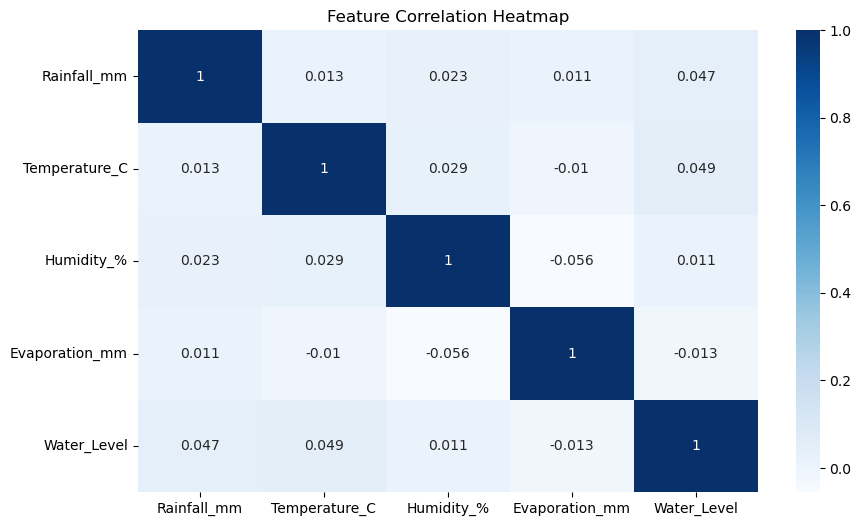

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns only
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()


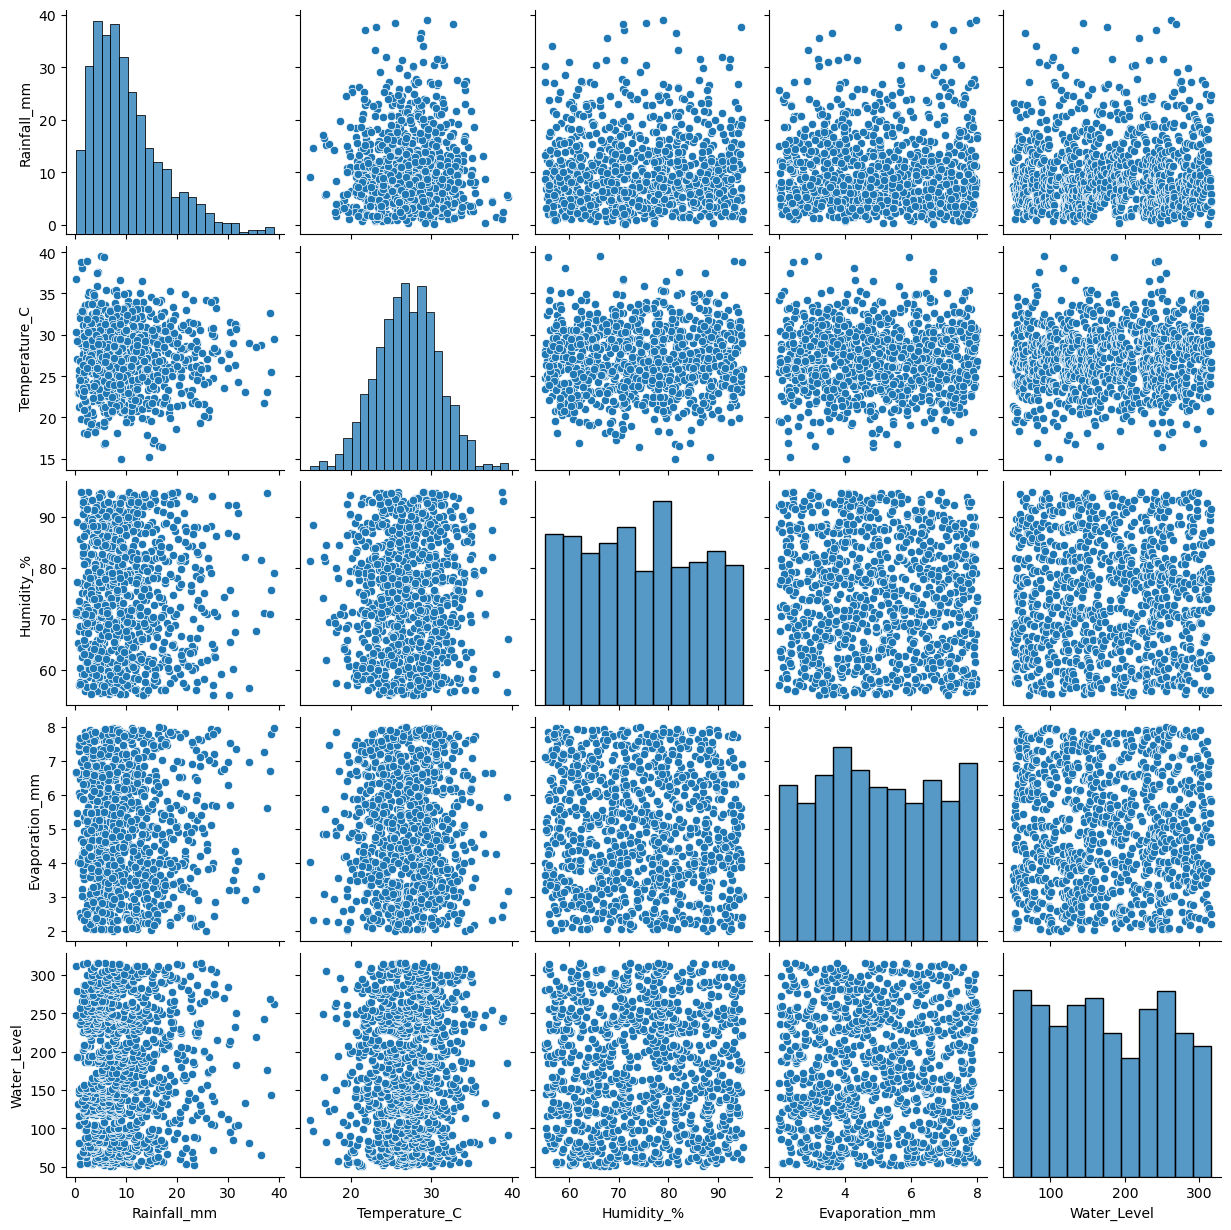

In [39]:
sns.pairplot(data)
plt.show()


In [42]:
print(data.columns)


Index(['Date', 'Rainfall_mm', 'Temperature_C', 'Humidity_%', 'Evaporation_mm',
       'Water_Level', 'Month', 'Year'],
      dtype='object')


In [46]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract useful features
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Do NOT drop the Date column
# data.drop('Date', axis=1, inplace=True)  # <- commented out



In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[ns]
 1   Rainfall_mm     1000 non-null   float64       
 2   Temperature_C   1000 non-null   float64       
 3   Humidity_%      1000 non-null   float64       
 4   Evaporation_mm  1000 non-null   float64       
 5   Water_Level     1000 non-null   float64       
 6   Month           1000 non-null   int32         
 7   Year            1000 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2)
memory usage: 54.8 KB


In [19]:
# Define features (exclude 'Water_Level' and 'Date')
X = data.drop(columns=['Water_Level', 'Date'])

# Define target
y = data['Water_Level']

# Quick check
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
X.head()
y.head()


Features (X) shape: (1000, 4)
Target (y) shape: (1000,)


0    50.42
1    50.63
2    50.80
3    50.96
4    51.85
Name: Water_Level, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% test data
    random_state=42      # For reproducibility
)

# Quick check
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 4)
X_test shape: (200, 4)
y_train shape: (800,)
y_test shape: (200,)


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Quick check
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (800, 4)
X_test_scaled shape: (200, 4)


# MODEL EVALUATION

In [24]:
# Model 1: Linear Regression (Baseline)

from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr = LinearRegression()

# Train the model on scaled training data
lr.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test_scaled)

# Quick check
print("Linear Regression predictions:", y_pred_lr[:5])




# Linear Regression Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)



Linear Regression predictions: [173.41993332 161.83910624 178.81526561 190.96901005 182.43568522]
Linear Regression Performance
MAE: 67.19165576251702
RMSE: 76.85604651524301
R² Score: -0.010501868518501212


In [25]:
import joblib

# Save the trained Linear Regression model
joblib.dump(lr, "model.pkl")


['model.pkl']

In [26]:
# Model 2: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model on scaled training data
rf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test_scaled)

# Quick check
print("Random Forest predictions:", y_pred_rf[:5])



# Random Forest Evaluation

# Random Forest metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)



Random Forest predictions: [150.19525 172.0499  161.5386  206.3957  218.6579 ]
Random Forest Performance
MAE: 69.87197900000002
RMSE: 80.95051162384678
R² Score: -0.12103774571893133


In [71]:
# Model 3: Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Train the model on scaled training data
gb.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_gb = gb.predict(X_test_scaled)

# Quick check
print("Gradient Boosting predictions:", y_pred_gb[:5])



# Gradient Boosting Evaluation

# Gradient Boosting metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Performance")
print("MAE:", mae_gb)
print("RMSE:", rmse_gb)
print("R² Score:", r2_gb)


Gradient Boosting predictions: [185.77485017 243.22598988 244.29045152 224.24258587 150.61366953]
Gradient Boosting Performance
MAE: 2.089794768746484
RMSE: 2.5905526989334104
R² Score: 0.9988519365186489


#### MODEL COMPARISON TABLE

In [74]:
# Create comparison table
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [mae_lr, mae_rf, mae_gb],
    "RMSE": [rmse_lr, rmse_rf, rmse_gb],
    "R2_Score": [r2_lr, r2_rf, r2_gb]
})

model_comparison


,Model,MAE,RMSE,R2_Score
0,Linear Regression,2.852676,3.562440,0.997829
1,Random Forest,2.172050,2.654265,0.998795
2,Gradient Boosting,2.089795,2.590553,0.998852


#### VISUALIZE MODEL PERFORMANCE

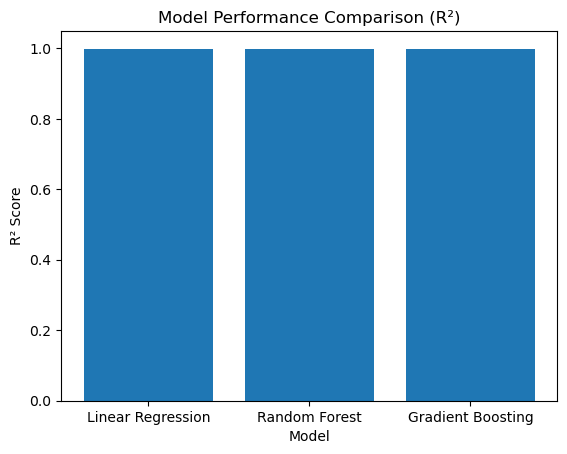

In [75]:
# R² Score Comparison Plot

import matplotlib.pyplot as plt

plt.figure()
plt.bar(model_comparison["Model"], model_comparison["R2_Score"])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R²)")
plt.show()


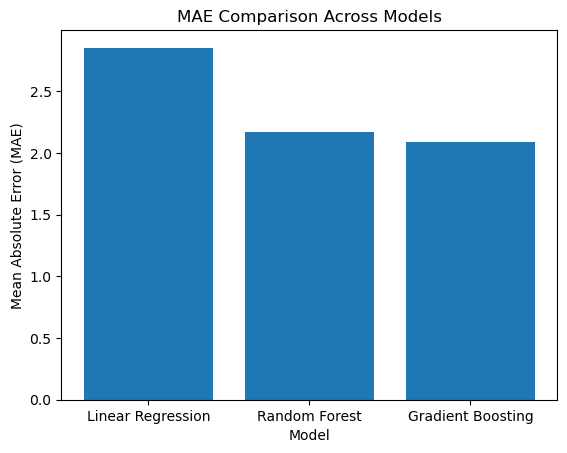

In [76]:
# MAE Bar Chart

import matplotlib.pyplot as plt

plt.figure()
plt.bar(model_comparison["Model"], model_comparison["MAE"])
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Comparison Across Models")
plt.show()


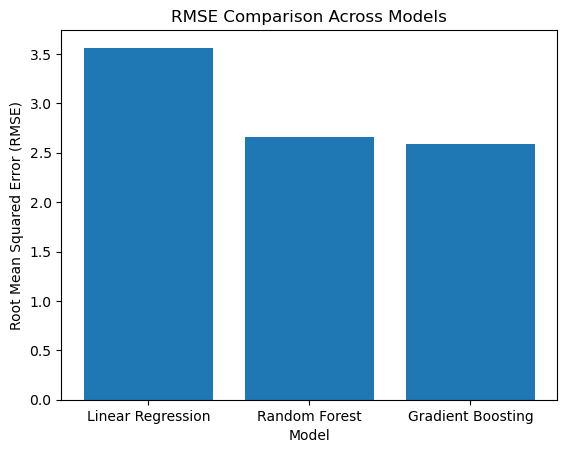

In [77]:
# RMSE Bar Chart

plt.figure()
plt.bar(model_comparison["Model"], model_comparison["RMSE"])
plt.xlabel("Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("RMSE Comparison Across Models")
plt.show()


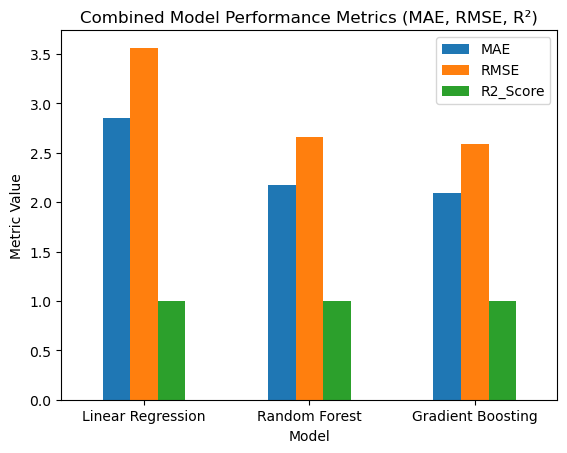

In [79]:

# Combined Metric Comparison

import matplotlib.pyplot as plt

# Set Model as index
metrics_plot = model_comparison.set_index("Model")[["MAE", "RMSE", "R2_Score"]]

metrics_plot.plot(kind="bar")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.title("Combined Model Performance Metrics (MAE, RMSE, R²)")
plt.xticks(rotation=0)
plt.legend()
plt.show()



In [66]:
# Feature Importance (Fixed)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame of feature importances from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,                 # Feature names
    'Importance': rf.feature_importances_ # Importance scores
}).sort_values(by='Importance', ascending=False)

# Display feature importance table
feature_importance


,Feature,Importance
5,Year,0.875303
4,Month,0.123792
3,Evaporation_mm,0.000245
0,Rainfall_mm,0.000234
2,Humidity_%,0.000222
1,Temperature_C,0.000205


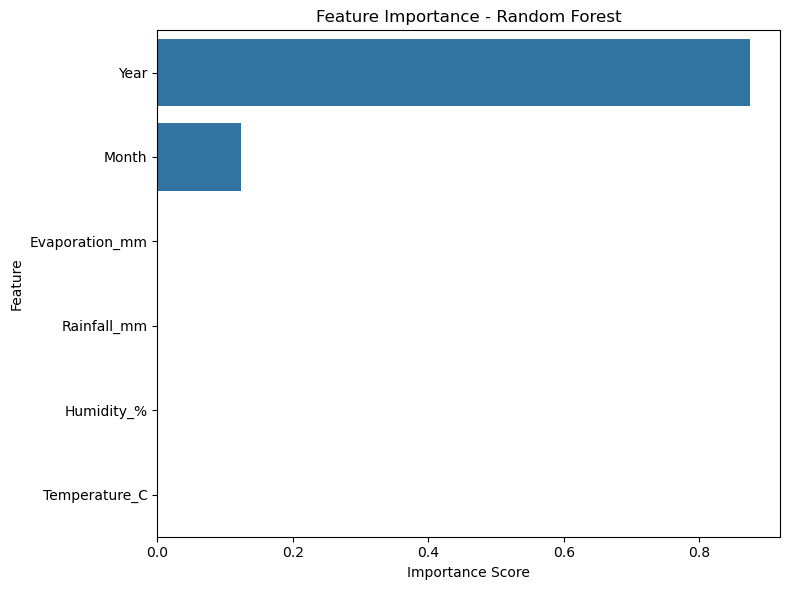

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Results and Discussion

The results show that ensemble-based models (Random Forest and Gradient Boosting)
outperform Linear Regression, indicating that the relationship between climatic
variables and water level is non-linear.

Among the models tested, the model with the highest R² score and lowest RMSE
is considered the most suitable for rainwater resource prediction. Feature
importance analysis reveals that rainfall and evaporation are the most
influential variables affecting water level changes.


## Conclusion

This study demonstrates that machine learning techniques can effectively predict
water level based on rainfall-related climatic variables. The developed model can
assist in rainwater resource planning, flood monitoring, and sustainable water
management. Future work may incorporate time-lag effects and real-world datasets
to further improve prediction accuracy.


In [1]:
import os
os.getcwd()


'C:\\Users\\USER\\Downloads\\root'

In [27]:
import os
os.listdir()


['.ipynb_checkpoints',
 'app.py',
 'hydrological_data_1000_rows (1).csv',
 'model.pkl',
 'rain data modeling (1) (2).ipynb']

In [28]:
import os
os.listdir()


['.ipynb_checkpoints',
 'app.py',
 'hydrological_data_1000_rows (1).csv',
 'model.pkl',
 'rain data modeling (1) (2).ipynb']